In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

In [4]:
from PIL import Image
import matplotlib.pyplot as plt
import os
import numpy as np
import sys


In [6]:
sys.path.append('/Users/ivanlengyel/coding_projects/image_cropper/')
from cropping_functions import *

In [8]:
folder_to_scan = '/Users/ivanlengyel/Desktop/stylegan/'

In [9]:
files = os.listdir(folder_to_scan)

In [14]:
valid_file_types = ['.png']
valid_files = []
for file in files:
    f, fe = os.path.splitext(file)
    if fe in valid_file_types:
        valid_files.append(file)

full_path_valid_files = [folder_to_scan+file for file in valid_files]
fakes = [ff for ff in full_path_valid_files if 'fake' in ff]

In [25]:
x_total = 3840/128
y_total = 2048/128
print(x_total, y_total)

30.0 16.0


In [ ]:
im = Image.open(fakes[-1])

In [ ]:
#shift
xs = 6
ys = 4
#windows
xd = 8
yd = 6

In [78]:
#shift
xs = 7
ys = 1
#windows
xd = 8
yd = 6

im_s = 128
imc = im.crop((xs*im_s, ys*im_s ,(xs+xd)*im_s, (ys+yd)*im_s))
imc_np = np.asarray(imc)

In [79]:
import imageio

<IPython.core.display.Javascript object>


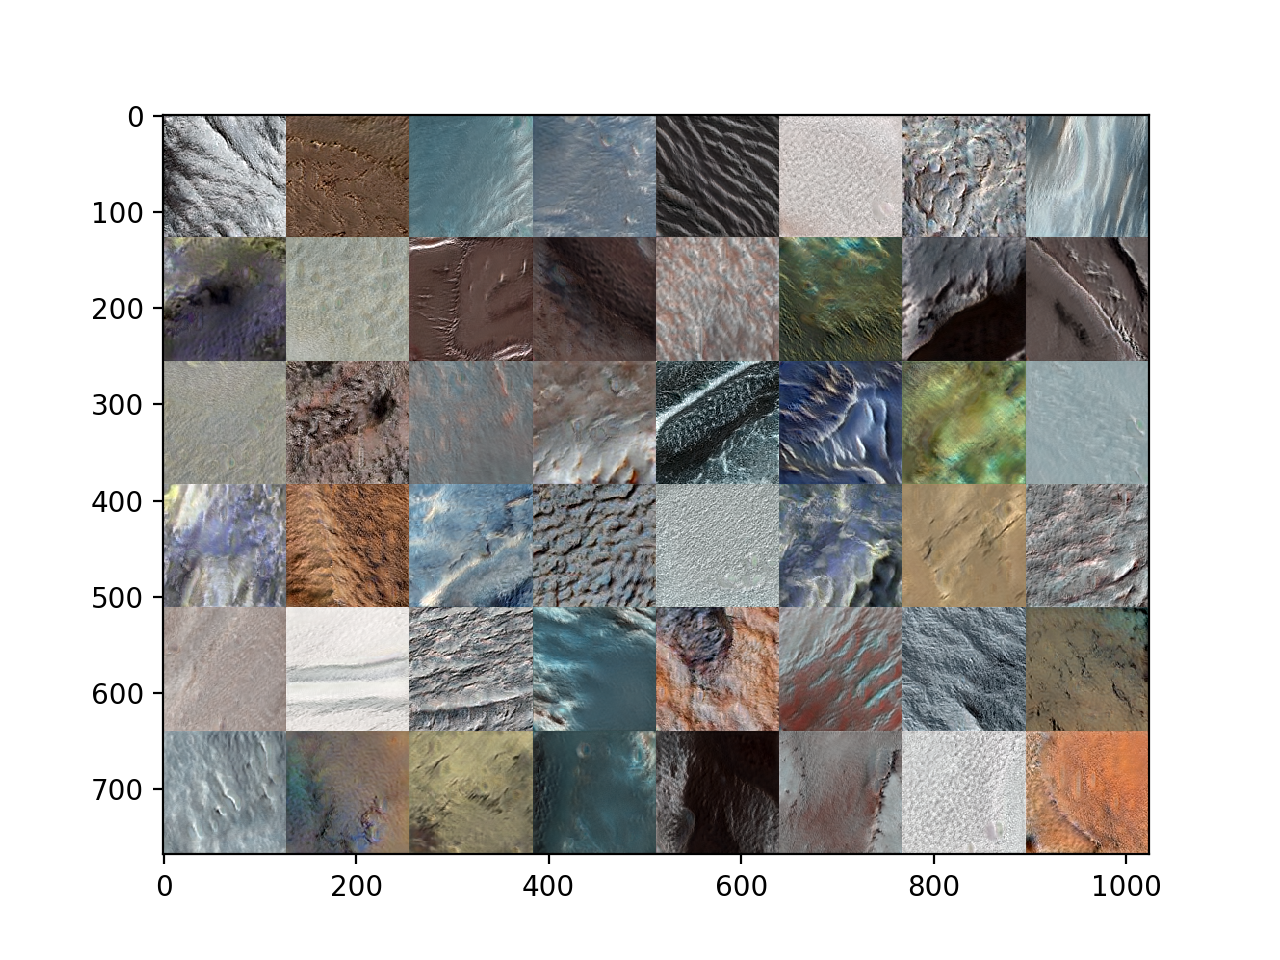

In [80]:
plt.figure()
plt.imshow(imc_np)

### Pipe read image

In [81]:
resize = 3

images = []
for ff in fakes:
    im = Image.open(ff) 
    imc = im.crop((xs*im_s, ys*im_s ,(xs+xd)*im_s, (ys+yd)*im_s))
    new_size = tuple([int(round(s/resize)) for s in list(imc.size)])
    imc = imc.resize(new_size)
    imc_np = np.asarray(imc)
    images.append(imc_np)

In [82]:
imageio.mimsave('./test.gif',images, format='GIF',fps=7)

## Generate custom samples of the image

In [93]:
im = Image.open(fakes[-1]) 

In [90]:
xs = 7
ys = 1
#windows
xd = 8
yd = 6

im_s = 128
imc = im.crop((xs*im_s, ys*im_s ,(xs+xd)*im_s, (ys+yd)*im_s))
imc.save('./fake_1_crop.jpg', format='JPEG')

In [91]:
xs = 7
ys = 7
#windows
xd = 8
yd = 6

im_s = 128
imc = im.crop((xs*im_s, ys*im_s ,(xs+xd)*im_s, (ys+yd)*im_s))
imc.save('./fake_2_crop.jpg', format='JPEG')

In [92]:
xs = 7+8
ys = 1
#windows
xd = 8
yd = 6

im_s = 128
imc = im.crop((xs*im_s, ys*im_s ,(xs+xd)*im_s, (ys+yd)*im_s))
imc.save('./fake_3_crop.jpg', format='JPEG')

#### real

In [95]:
im = Image.open('/Users/ivanlengyel/Desktop/stylegan/reals.png') 

In [96]:
xs = 7
ys = 1
#windows
xd = 8
yd = 6

im_s = 128
imc = im.crop((xs*im_s, ys*im_s ,(xs+xd)*im_s, (ys+yd)*im_s))
imc.save('./real_1_crop.jpg', format='JPEG')